**Importing the Libraries**

In [8]:
import pandas as pd
import sklearn

**Loading the Dataset**

In [2]:
df = pd.read_csv("loan_dataset.csv")

In [3]:
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


**Understanding the Data**

In [4]:
df.shape

(20000, 22)

In [5]:
df.columns

Index(['age', 'gender', 'marital_status', 'education_level', 'annual_income',
       'monthly_income', 'employment_status', 'debt_to_income_ratio',
       'credit_score', 'loan_amount', 'loan_purpose', 'interest_rate',
       'loan_term', 'installment', 'grade_subgrade', 'num_of_open_accounts',
       'total_credit_limit', 'current_balance', 'delinquency_history',
       'public_records', 'num_of_delinquencies', 'loan_paid_back'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

**Handling the Missing values**

In [7]:
df.isnull().sum()

,0
age,0
gender,0
marital_status,0
education_level,0
annual_income,0
monthly_income,0
employment_status,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0


**Encode Categorical Data**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['education_level'] = le.fit_transform(df['education_level'])
df['employment_status'] = le.fit_transform(df['employment_status'])
df['loan_paid_back'] = le.fit_transform(df['loan_paid_back'])

**Spliting the Data**

In [15]:
X = df.drop('loan_paid_back', axis=1)
y = df['loan_paid_back']

In [18]:
categorical_cols = [
    'gender', 'marital_status', 'education_level',
    'employment_status', 'loan_purpose', 'grade_subgrade'
]

numeric_cols = X.drop(columns=categorical_cols).columns

In [19]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

**Train-test split**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

**Train the Model**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Model Evaluation **

In [24]:
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.817

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 519,  299],
       [ 433, 2749]])

**Save the Model**

In [27]:
import pickle

pickle.dump(model, open("loan_model.pkl", "wb"))

**Visualization**

📊 1️⃣ Loan Approval Count

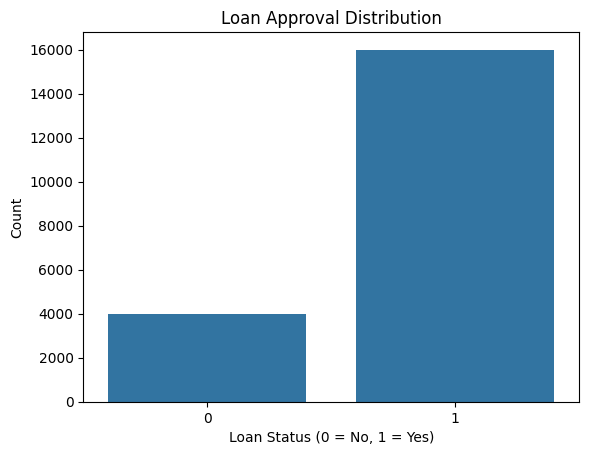

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='loan_paid_back', data=df)
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

📊 2️⃣ Education vs Loan Approval

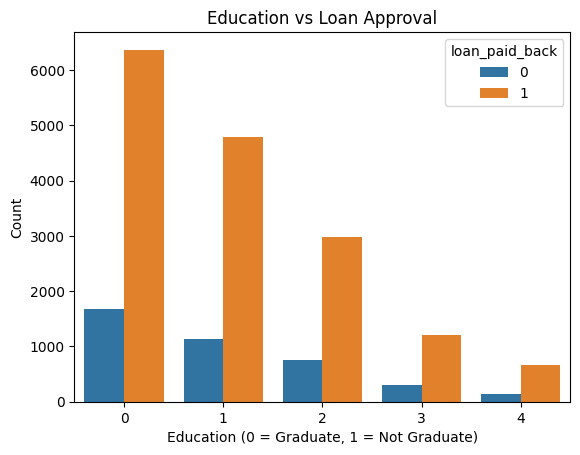

In [30]:
sns.countplot(x='education_level', hue='loan_paid_back', data=df)
plt.title("Education vs Loan Approval")
plt.xlabel("Education (0 = Graduate, 1 = Not Graduate)")
plt.ylabel("Count")
plt.show()

📊 3️⃣ Credit History vs Loan Approval

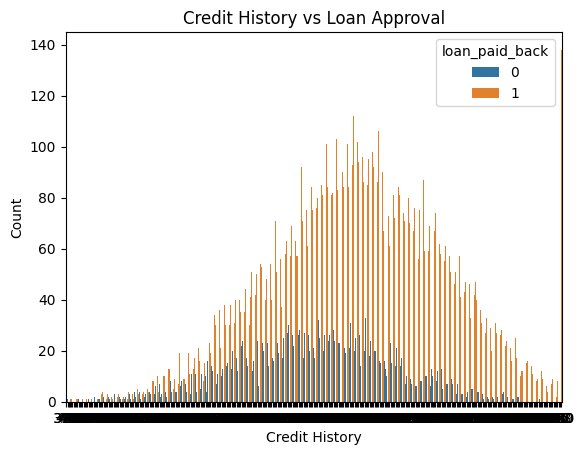

In [31]:
sns.countplot(x='credit_score', hue='loan_paid_back', data=df)
plt.title("Credit History vs Loan Approval")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.show()

📊 4️⃣ Confusion Matrix Visualization

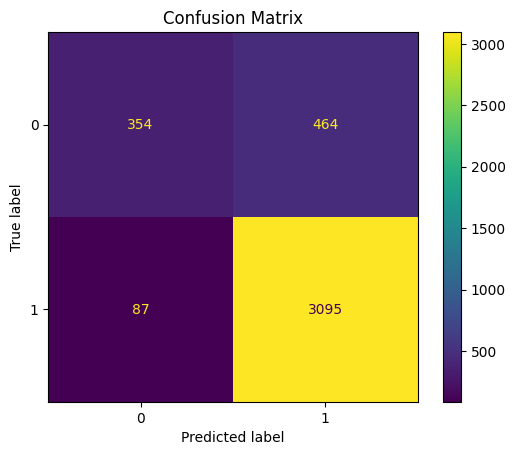

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()